In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
import numpy as np

In [7]:
df = pd.read_csv('/Users/butler/Documents/hp/Capstone_Two/data/interim/after_EDA/stroke.csv')

In [8]:
df.head()

,CensusTract,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Stroke_prevalence
0,1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,3.1
1,1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,3.7
2,1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,3.3
3,1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,3.0
4,1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,2.4


In [9]:
df.set_index('CensusTract', inplace=True)
df.head()


,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS,Stroke_prevalence
CensusTract,,,,,,,,,,,,
1001020100,9.690899,36.760212,0.278663,49.377032,0.788052,31.854621,0.167272,0.066526,0.077568,0.495631,0.000000,3.1
1001020200,9.711240,36.836966,0.304313,50.320741,0.808744,133.186831,0.262809,0.073066,0.083303,0.867199,0.000000,3.7
1001020300,9.745683,36.884999,0.364215,50.772140,0.816773,183.972683,0.078924,0.075626,0.082494,1.528117,0.000000,3.3
1001020400,9.761186,36.949586,0.447920,51.595926,0.835904,448.339640,0.114548,0.084700,0.087962,2.299506,0.000000,3.0
1001020500,9.791458,37.041363,0.499163,51.729998,0.841417,198.171325,0.000000,0.094754,0.091258,1.635841,0.000005,2.4


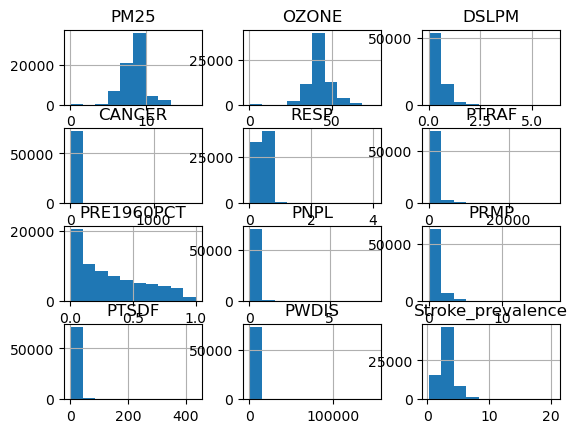

In [10]:
df.hist()
plt.show()

In [11]:
X = df.copy()
X.drop('Stroke_prevalence', axis=1, inplace=True)
y = df['Stroke_prevalence']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(54242, 11) (18081, 11) (54242,) (18081,)


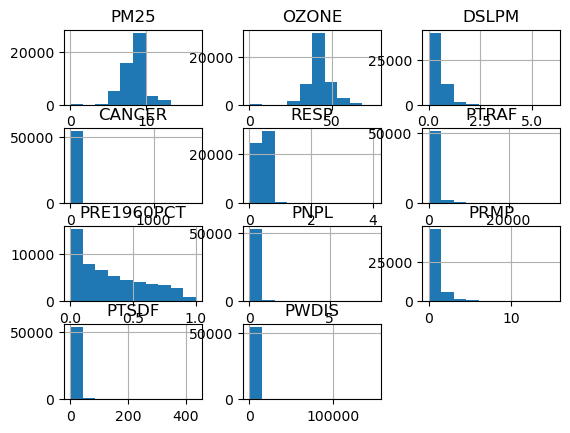

In [14]:
X_train.hist()
plt.show()

In [15]:
X_train.head()

,PM25,OZONE,DSLPM,CANCER,RESP,PTRAF,PRE1960PCT,PNPL,PRMP,PTSDF,PWDIS
CensusTract,,,,,,,,,,,
36117020301,6.590529,40.079115,0.193800,19.842445,0.236883,18.290989,0.311697,0.023549,0.131229,0.701755,0.121547
26125183800,9.415786,43.539982,0.629246,28.812162,0.366447,1042.671718,0.738423,0.061842,0.579550,2.309250,0.005598
8014031000,8.486452,54.726449,0.622794,29.299062,0.402534,96.914822,0.003014,0.066266,0.312800,0.524197,0.001925
37197050200,8.025847,43.297484,0.163819,28.821971,0.381622,0.000000,0.303514,0.136017,0.099042,0.116172,0.000352
55079014100,7.442152,44.024854,0.830464,25.793570,0.378853,4851.359020,0.464658,0.057822,2.545329,12.099152,0.000224


In [16]:
# Saving data without normalization

X_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_stroke')
X_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_stroke')
y_test.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_stroke')
y_train.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_stroke')

In [17]:
# Taking the log of the data in X_train that are not close to being normally distributed

X_train_log = X_train.copy()
pt = PowerTransformer()
pt.fit(X_train_log[['DSLPM']])
X_train_log['DSLPM'] = pt.transform(X_train_log[['DSLPM']])

pt1 = PowerTransformer()
pt1.fit(X_train_log[['CANCER']])
X_train_log['CANCER'] = pt1.transform(X_train_log[['CANCER']])

pt2 = PowerTransformer()
pt2.fit(X_train_log[['RESP']])
X_train_log['RESP'] = pt2.transform(X_train_log[['RESP']]) 

pt3 = PowerTransformer()
pt3.fit(X_train_log[['PTRAF']])
X_train_log['PTRAF'] = pt3.transform(X_train_log[['PTRAF']])

pt4 = PowerTransformer()
pt4.fit(X_train_log[['PRE1960PCT']])
X_train_log['PRE1960PCT'] = pt4.transform(X_train_log[['PRE1960PCT']])

pt5 = PowerTransformer()
pt5.fit(X_train_log[['PNPL']])
X_train_log['PNPL'] = pt5.transform(X_train_log[['PNPL']])

pt6 = PowerTransformer()
pt6.fit(X_train_log[['PRMP']])
X_train_log['PRMP'] = pt6.transform(X_train_log[['PRMP']])

pt7 = PowerTransformer()
pt7.fit(X_train[['PTSDF']])
X_train['PTSDF'] = pt7.transform(X_train[['PTSDF']])

pt8 = PowerTransformer()
pt8.fit(X_train_log[['PWDIS']])
X_train_log['PWDIS'] = pt8.transform(X_train_log[['PWDIS']])

y_train_log = y_train.copy()
pt9 = PowerTransformer()
y_train_log = np.array(y_train_log)
y_train_log = y_train_log.reshape(-1,1)
pt9.fit(y_train_log)
y_train_log = pt9.transform(y_train_log)
y_train_log = np.ravel(y_train_log)

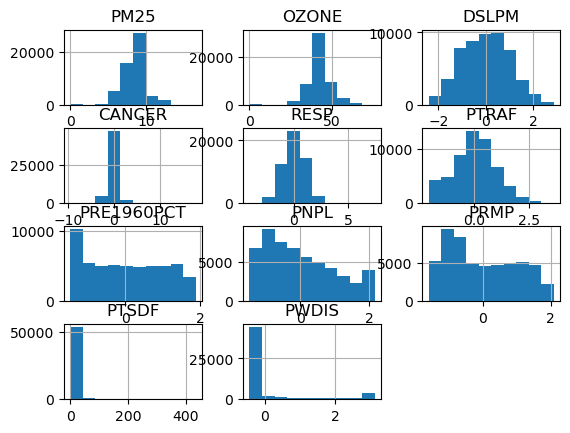

In [18]:
X_train_log.hist()
plt.show()

PWDIS should just be left out of the data because it is not normally distributed.

In [19]:
X_test_log = X_test.copy()

In [20]:
X_test_log.drop('PWDIS', axis=1, inplace=True)
X_train_log.drop('PWDIS', axis=1, inplace=True)

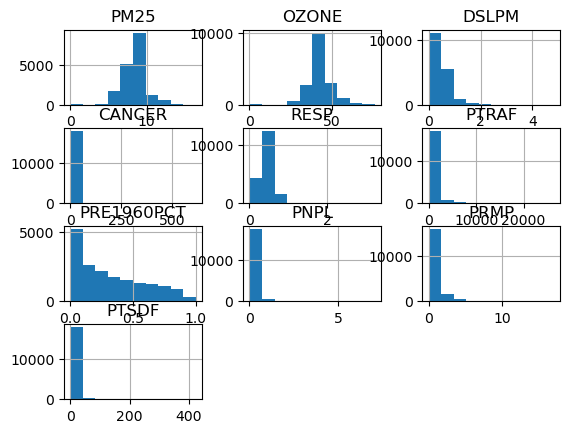

In [21]:
X_test_log.hist()
plt.show()

In [22]:
# Transforming the test data using the PowerTransformer that I fit on the train data
X_test_log['DSLPM'] = pt.transform(X_test_log[['DSLPM']])

X_test_log['CANCER'] = pt1.transform(X_test_log[['CANCER']])

X_test_log['RESP'] = pt2.transform(X_test_log[['RESP']]) 

X_test_log['PTRAF'] = pt3.transform(X_test_log[['PTRAF']])

X_test_log['PRE1960PCT'] = pt4.transform(X_test_log[['PRE1960PCT']])

X_test_log['PNPL'] = pt5.transform(X_test_log[['PNPL']])

X_test_log['PRMP'] = pt6.transform(X_test_log[['PRMP']])

X_test_log['PTSDF'] = pt7.transform(X_test_log[['PTSDF']])


y_test_log = y_test.copy()
y_test_log = np.array(y_test_log)
y_test_log = y_test_log.reshape(-1,1)
y_test_log = pt9.transform(y_test_log)
y_test_log = y_test_log.reshape(18081,)

print(X_train_log.shape, y_train_log.shape, X_test_log.shape, y_test_log.shape)

(54242, 10) (54242,) (18081, 10) (18081,)


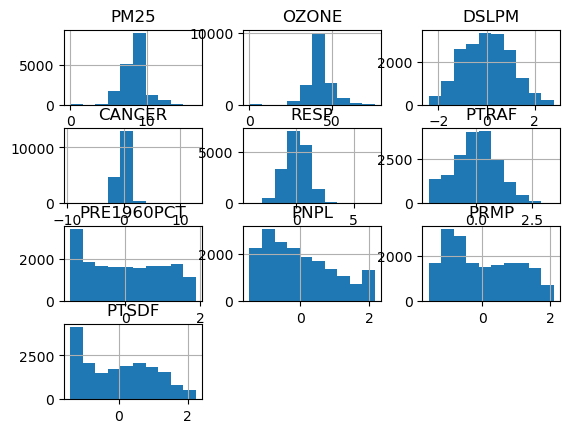

In [23]:
X_test_log.hist()
plt.show()

Stroke data should now be ready to model

In [24]:
X_test_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_test_log_stroke')
X_train_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/X_train_log_stroke')

y_test_log = pd.Series(y_test)

y_train_log = pd.Series(y_train)
y_test_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_test_log_stroke')
y_train_log.to_csv('/Users/butler/Documents/hp/Capstone_Two/data/processed/y_train_log_stroke')